# <center> THE SPARKS FOUNDATION </center>
## <center> Data Science & Business Analytics Internship (April2021) <center>

## Created by : Tushar Gupta

# Task 1: Prediction using Supervised ML
In this task, we will pedict the percentage of marks that a student is expected to score based upon the numbers of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in the task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Step1: Reading the Data

In [2]:
#importing the dataset
student = pd.read_csv('./student.txt')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking if there is any null value in the dataset
student.isnull==True

False

## Step2 : Data Visualization

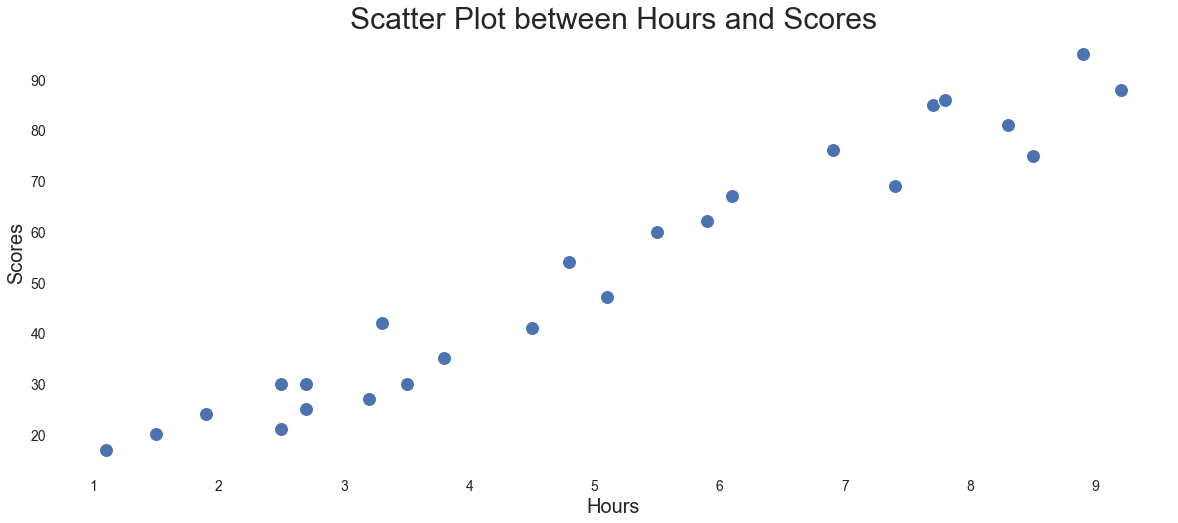

In [4]:
# plotting the dataset on 2D space, since there are only two variables out of which one is independent variable other is 
# dependent variable
plt.figure(figsize = (20,8))
sns.set(rc = {'xtick.labelsize':14, 'ytick.labelsize':14, 'axes.labelsize':20, 'axes.grid':False, 'axes.facecolor':'white'})
sns.scatterplot(x = student.Hours, y = student.Scores, s=200)
plt.title('Scatter Plot between Hours and Scores', fontsize= 30)
plt.show()

#### From the above scatter plot its clearly visible that there is positive correlation between Scores and Hours, it means that there will be increase in scores achieved by student if there is increas in hours he studies

## Step3:Preparing the data

Dividing the dataset into attribures(inputs) and labels(output)

In [5]:
x = student.iloc[:,:-1].values
y = student.iloc[:,-1].values

now splitting the attributes and labels into training set and test set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

## Step4: Training the algorithm

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Step5: Printing the Regression Line

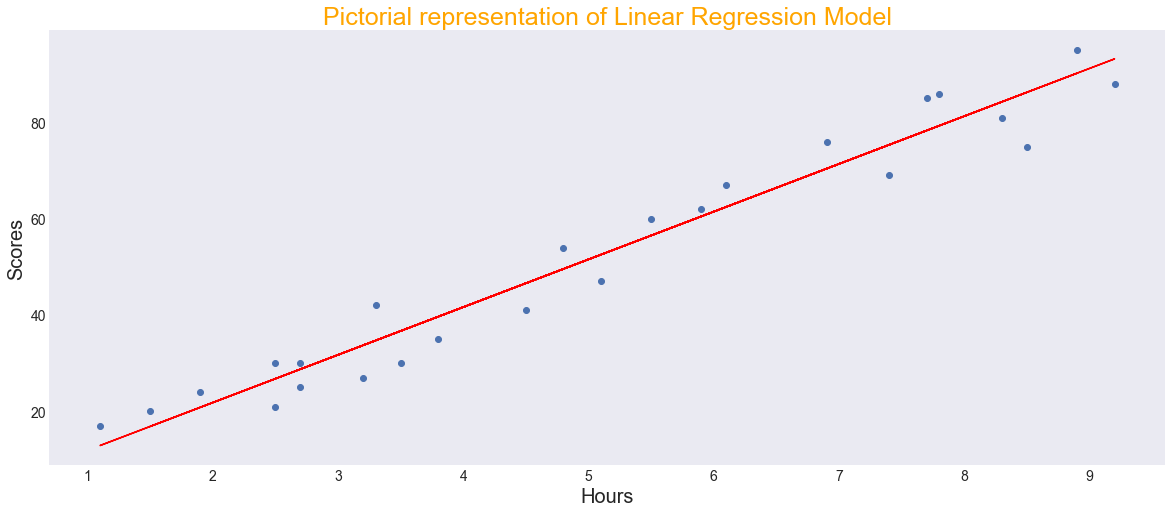

In [8]:
#plotting the regression line
plt.figure(figsize= (20,8))
plt.style.use('seaborn-dark')
plt.plot(x, regressor.coef_*x + regressor.intercept_, color = 'red')
plt.scatter(x, y)
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Pictorial representation of Linear Regression Model', fontsize = 25, color = 'orange')
plt.show()

## Step 6: Make predictions
Now we have trained our model,  its time for prediction

In [9]:
y_pred = regressor.predict(x_test)


## step 7: Comparing Actual and Predicted Values

In [10]:
# comparing the actual scores and the predicted scores
df = pd.DataFrame({'Actual Scores':y_test,'Predicted Scores':y_pred})
df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **What will be the predicted score if student studies for 9.25 hours/day**

In [11]:
hours_studies = 9.5
hours_studies = np.array(hours_studies)
hours_studies = hours_studies.reshape(-1,1)
predicted_score = regressor.predict(hours_studies)
print('If student studies for {} hours'.format(hours_studies))
print('Then he will score {} marks'.format(float(predicted_score)))

If student studies for [[9.5]] hours
Then he will score 96.16939660753592 marks


## Step 8: **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root mean squared Error: 4.647447612100367
